In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
from sklearn.externals import joblib
from sklearn.metrics import *
from sklearn.preprocessing import *
from numpy import random
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from __future__ import print_function
import matplotlib.cm as cm
%matplotlib inline

In [3]:
save_load_path = '/Users/YuchenZhou/Dropbox (Personal)/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles'
np_tfPCA = np.load(save_load_path+'/pc_scores_tf.npy')
np_tfPCA
np_tfPCA_scaled = scale(np_tfPCA)# standardize data
df_tfPCA = pd.DataFrame(np_tfPCA)
df_tfPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,680,681,682,683,684,685,686,687,688,689
0,0.186950,-0.701572,-0.052846,0.191101,-0.251217,0.369705,0.133613,-0.297389,-0.305885,-0.036480,...,-0.004734,-0.153054,-0.352898,0.192704,0.264830,-0.671410,0.258226,-0.348159,0.074935,0.531504
1,0.118320,-0.445287,-0.066093,0.111806,0.228437,-0.083253,-0.267623,0.422979,0.222881,0.002106,...,0.231567,-0.358119,0.012385,-0.245406,0.926008,0.211039,0.188465,0.011283,0.809165,-0.426070
2,0.083460,-0.551106,-0.041388,0.053684,-0.200381,-0.030589,0.394346,-0.392346,0.417844,0.166836,...,-0.326450,-0.211600,-0.298725,-0.078460,-0.096595,-0.165189,-0.389969,-0.032154,-0.105759,0.072328
3,0.196959,-1.066485,-0.040461,-0.297458,0.021370,0.076783,0.046925,0.199595,0.030110,0.293376,...,-0.259540,0.160898,-0.755673,-0.323658,-1.038595,0.461247,0.237164,0.356880,-0.091991,-0.123125
4,0.192469,-0.923165,-0.049231,-0.591950,0.219419,-0.170671,-0.684690,0.416564,0.040813,-0.216717,...,0.170986,0.110501,-0.708801,-0.287537,-0.081755,0.736507,0.056367,0.009066,0.854549,0.160724


Run cluster analysis, with the number of cluster ranging from 2 to 30

In [4]:
k_range=range(2,30)
k_means_var=[KMeans(n_clusters=k, random_state=10).fit(df_tfPCA) for k in k_range]
centroids=[X.cluster_centers_ for X in k_means_var]

Calculate Euclidean distance, WCSS, TSS and BSS.

- WCSS(within cluster sum of squares): the total distance of data points from their respective cluster centroids

- AWSS(average within cluster sum of squares): the average distance of data points from their respective cluster centroids

- BSS(between cluster sum of squares): total distance of various cluster centroids to the global mean of data

- TSS(total sum of squares): total distance of data points from global mean of data, for a given dataset tss is going to be constant

-  Rsq, i.e. BSS/TSS, is the total variance explained by clustering

we expect WCSS to be lower and BSS to be higher, thus we should select the iteration with maximum BSS/TSS

In [8]:
# calculate pairwise distances between clusters using Minkowski distance
D_k = [cdist(df_tfPCA, cent, 'minkowski',3) for cent in centroids]

# returns the smallest euclidean distance between clusters
dist = [np.min(D,axis=1) for D in D_k]

AWSS = [sum(d)/df_tfPCA.shape[0] for d in dist]
WCSS = [sum(d**2) for d in dist]
TSS = sum(pdist(df_tfPCA)**2)/df_tfPCA.shape[0]
BSS = TSS-WCSS
Rsq = BSS/TSS

## Elbow curve

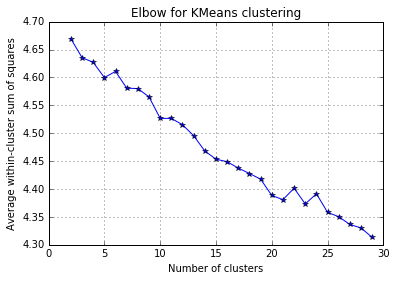

In [9]:
fig = plt.figure() #create a figure contain all the plots
ax = fig.add_subplot(111)
ax.plot(k_range, AWSS, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

## Variance Explained vs K

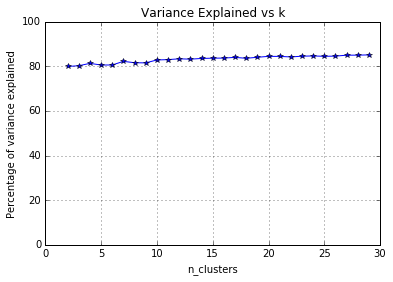

In [10]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, Rsq*100, 'b*-') 
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('n_clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Variance Explained vs k')

## Silhouette Coefficient vs K

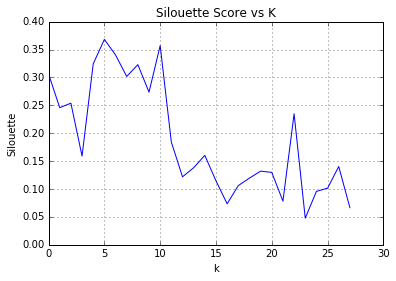

In [11]:
s=[silhouette_score(df_tfPCA, X.labels_, metric='minkowski', p=3, random_state=10) for X in k_means_var]   
plt.plot(s)
plt.grid(True)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette Score vs K")

In [12]:
output_path = '/Users/YuchenZhou/Dropbox (Personal)/MA755 Public/pynotes/Danny-Eole-Yuchen/Pickles/Clustering/Data output/'
#choose the number of clusters, 6
num_clusters = 5

km = KMeans(n_clusters=num_clusters, random_state=10)

%time km.fit(df_tfPCA)

#dump the cluster into pickle file and load
joblib.dump(km, output_path+'cluster_lyrics_tfPCA.pkl')

km = joblib.load(output_path + 'cluster_lyrics_tfPCA.pkl')

predict = km.fit_predict(np_tfPCA)

CPU times: user 1.94 s, sys: 54.8 ms, total: 2 s
Wall time: 522 ms


In [13]:
#add cluster index as 'cluster' column to the dataframe
df_tfPCA['cluster']= predict

In [14]:
df_tfPCA.head()

,0,1,2,3,4,5,6,7,8,9,...,681,682,683,684,685,686,687,688,689,cluster
0,0.186950,-0.701572,-0.052846,0.191101,-0.251217,0.369705,0.133613,-0.297389,-0.305885,-0.036480,...,-0.153054,-0.352898,0.192704,0.264830,-0.671410,0.258226,-0.348159,0.074935,0.531504,3
1,0.118320,-0.445287,-0.066093,0.111806,0.228437,-0.083253,-0.267623,0.422979,0.222881,0.002106,...,-0.358119,0.012385,-0.245406,0.926008,0.211039,0.188465,0.011283,0.809165,-0.426070,0
2,0.083460,-0.551106,-0.041388,0.053684,-0.200381,-0.030589,0.394346,-0.392346,0.417844,0.166836,...,-0.211600,-0.298725,-0.078460,-0.096595,-0.165189,-0.389969,-0.032154,-0.105759,0.072328,0
3,0.196959,-1.066485,-0.040461,-0.297458,0.021370,0.076783,0.046925,0.199595,0.030110,0.293376,...,0.160898,-0.755673,-0.323658,-1.038595,0.461247,0.237164,0.356880,-0.091991,-0.123125,0
4,0.192469,-0.923165,-0.049231,-0.591950,0.219419,-0.170671,-0.684690,0.416564,0.040813,-0.216717,...,0.110501,-0.708801,-0.287537,-0.081755,0.736507,0.056367,0.009066,0.854549,0.160724,3


In [15]:
#group by cluster index and compute the mean for each cluster on each column
df_grouped = df_tfPCA.groupby(df_tfPCA['cluster'])
df_grouped.mean()

,0,1,2,3,4,5,6,7,8,9,...,680,681,682,683,684,685,686,687,688,689
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.124678,-0.667556,-0.033768,-0.081326,-0.038298,-0.098012,0.097657,-0.149988,0.036737,0.199243,...,0.006682,0.017856,-0.053019,-0.038972,-0.055897,-0.017179,0.041723,0.031528,-0.014494,0.027796
1,0.300759,-1.425117,-0.107357,-0.239391,0.456119,-0.097299,-0.566828,0.331197,0.234108,-0.267402,...,0.548908,-0.119973,-0.381501,-0.279133,0.410960,-0.259636,-0.103884,-0.222276,0.290862,0.281077
2,1.011906,-6.696643,0.045084,-0.738681,1.324003,-0.335179,-0.839537,0.505190,-0.017009,0.246001,...,-0.081834,0.140796,-0.185931,-0.093686,-0.182029,0.083599,-0.222308,0.141575,-0.205483,0.254115
3,0.292575,-1.494650,-0.068716,-0.096600,0.133757,-0.144112,-0.204122,0.125163,0.086404,0.159909,...,0.033478,0.123960,-0.158193,-0.066664,-0.072127,-0.025037,0.059337,-0.027825,0.032695,0.111123
4,1.006589,-6.440619,-0.025149,0.393246,0.148703,-2.478078,-3.269761,2.778176,-0.084332,-2.231579,...,0.761406,0.914274,1.913702,-0.468738,-0.458938,0.599532,-0.882969,-0.493617,0.591635,0.900123


In [16]:
df_grouped['cluster'].count()

cluster
0    1357
1     117
2      98
3     407
4       1
Name: cluster, dtype: int64

## Silhouette Coefficient Analysis 

In [17]:
y = km.labels_
X = np_tfPCA
range_n_clusters=[2,3,4,5,6,7,8]

For n_clusters = 2 The average silhouette_score is : 0.305951728297


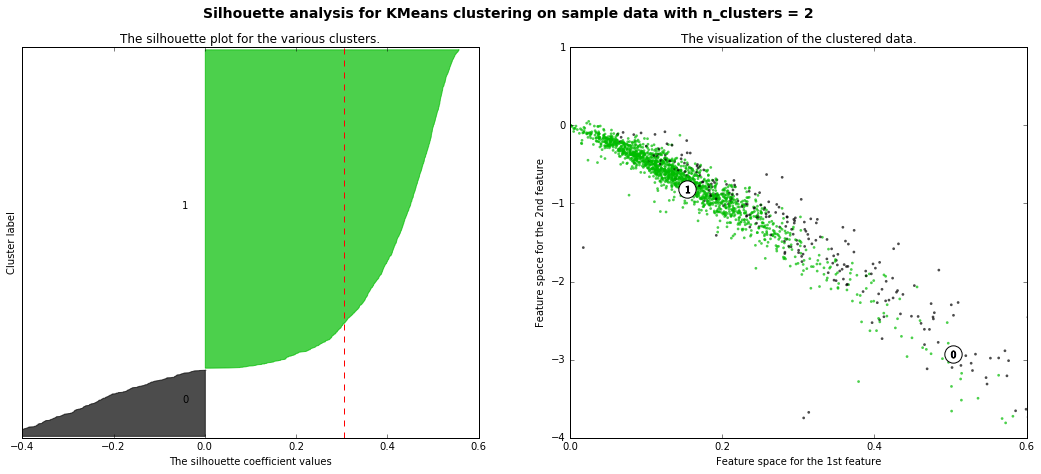

For n_clusters = 3 The average silhouette_score is : 0.245725579132


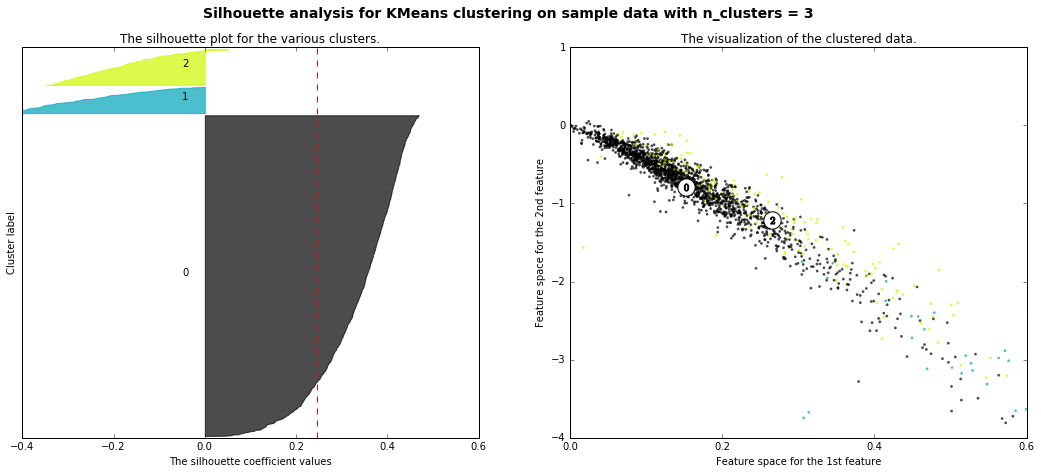

For n_clusters = 4 The average silhouette_score is : 0.253860037529


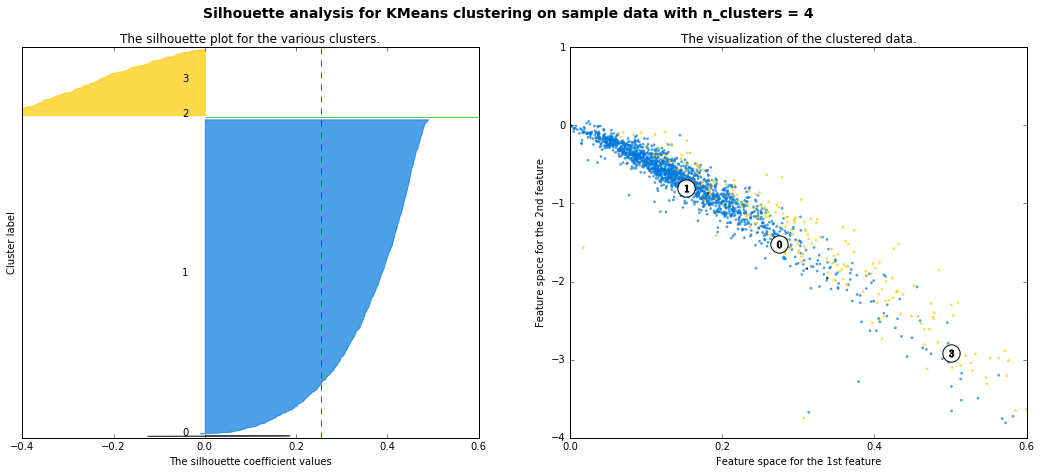

For n_clusters = 5 The average silhouette_score is : 0.158939784678


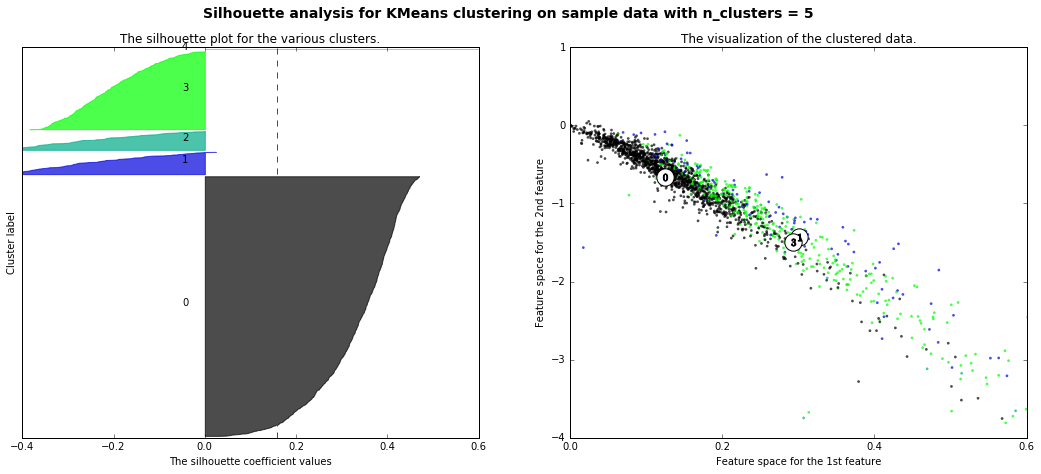

For n_clusters = 6 The average silhouette_score is : 0.324236771893


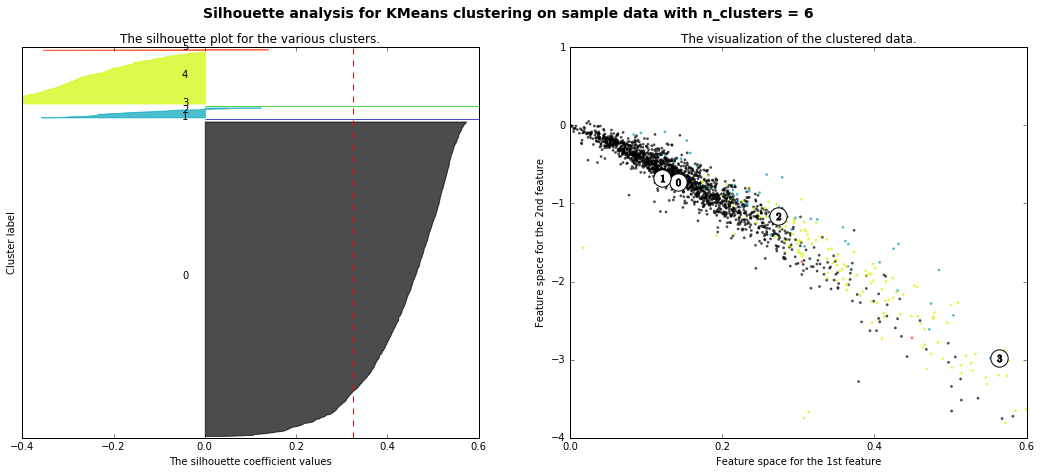

For n_clusters = 7 The average silhouette_score is : 0.368100035736


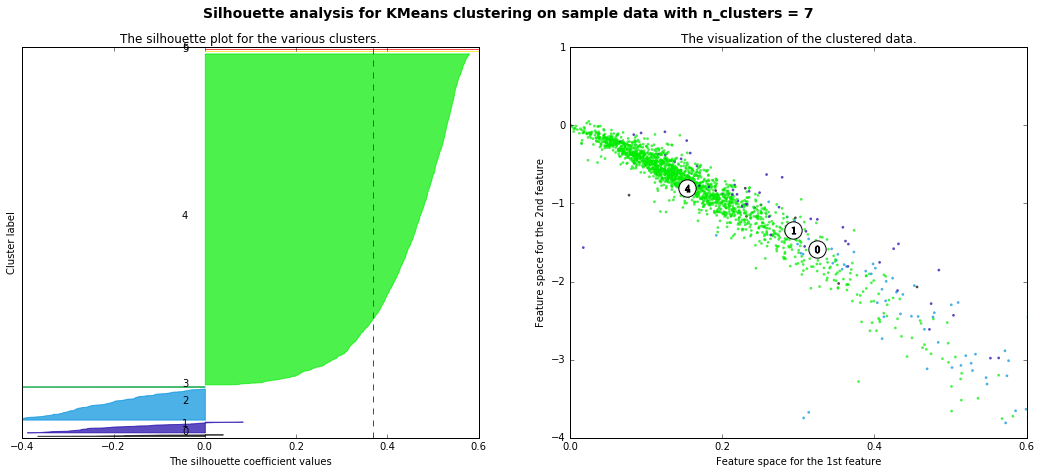

For n_clusters = 8 The average silhouette_score is : 0.340250499393


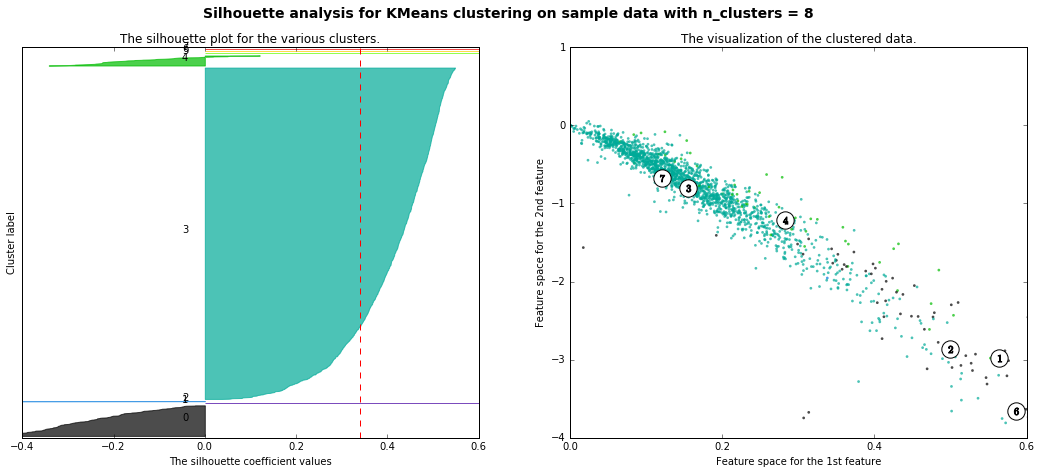

In [21]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 0.1]
    ax1.set_xlim([-0.4,0.6])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric='minkowski', p=3)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels, metric='minkowski', p=3)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.4,-0.2, 0, 0.2, 0.4,0.6])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.set_ylim([-4, 1])
    ax2.set_xlim([0, 0.6])
    ax2.set_xticks([0,0.2,0.4,0.6])
    ax2.set_yticks([-4,-3,-2,-1,0,1])

    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=300)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Reference:

http://www.pybloggers.com/grouping-nba-players/

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py